<a href="https://colab.research.google.com/github/pseudo-xy/pseudo-xy/blob/main/neural_net_on_red_wine_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload = files.upload()

Saving red-wine.csv to red-wine.csv


In [3]:
import pandas as pd
wine = pd.read_csv('red-wine.csv')

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Create training and validation splits
df_train = wine.sample(frac=0.7, random_state=0)
df_valid = wine.drop(df_train.index)

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [14]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,0.548673,0.239726,0.544304,0.092308,0.237435,0.366197,0.212014,0.619193,0.291262,0.260606,0.369231,0.6
1032,0.309735,0.479452,0.000000,0.246154,0.105719,0.056338,0.028269,0.645088,0.475728,0.121212,0.184615,0.4
1002,0.398230,0.116438,0.417722,0.088462,0.050260,0.169014,0.074205,0.387662,0.378641,0.309091,0.507692,0.8
487,0.495575,0.359589,0.455696,0.069231,0.032929,0.056338,0.028269,0.619193,0.291262,0.054545,0.246154,0.6
979,0.672566,0.226027,0.620253,0.038462,0.071057,0.028169,0.000000,0.520183,0.252427,0.181818,0.307692,0.4


In [15]:
model = keras.Sequential([layers.Dense(units=512, activation='relu', input_shape=[11]), layers.Dense(units=512, activation='relu'), layers.Dense(units=512, activation='relu'), 
                          layers.Dense(units=1)])

In [16]:
model.compile(optimizer='adam', loss='mae')

In [17]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 1s 74ms/step - loss: 0.2580 - val_loss: 0.1353
Epoch 2/10
5/5 [==============================] - 0s 30ms/step - loss: 0.1367 - val_loss: 0.1238
Epoch 3/10
5/5 [==============================] - 0s 30ms/step - loss: 0.1274 - val_loss: 0.1236
Epoch 4/10
5/5 [==============================] - 0s 41ms/step - loss: 0.1243 - val_loss: 0.1134
Epoch 5/10
5/5 [==============================] - 0s 35ms/step - loss: 0.1173 - val_loss: 0.1122
Epoch 6/10
5/5 [==============================] - 0s 30ms/step - loss: 0.1093 - val_loss: 0.1044
Epoch 7/10
5/5 [==============================] - 0s 30ms/step - loss: 0.1065 - val_loss: 0.1062
Epoch 8/10
5/5 [==============================] - 0s 33ms/step - loss: 0.1039 - val_loss: 0.1013
Epoch 9/10
5/5 [==============================] - 0s 29ms/step - loss: 0.1025 - val_loss: 0.1058
Epoch 10/10
5/5 [==============================] - 0s 35ms/step - loss: 0.1029 - val_loss: 0.1006


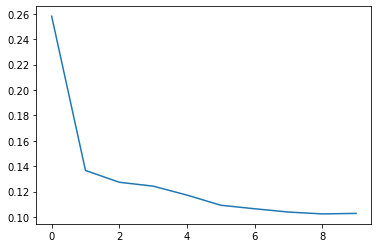

In [18]:
# converting  the training history to a dataframe
history_df = pd.DataFrame(history.history)
# using Pandas native plot method
history_df['loss'].plot();